In [15]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [16]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
houseLotArea = pd.DataFrame(houseData['LotArea'])
houseTotalBsmtSF = pd.DataFrame(houseData['TotalBsmtSF'])
houseGarageArea = pd.DataFrame(houseData['GarageArea'])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])

<AxesSubplot:>

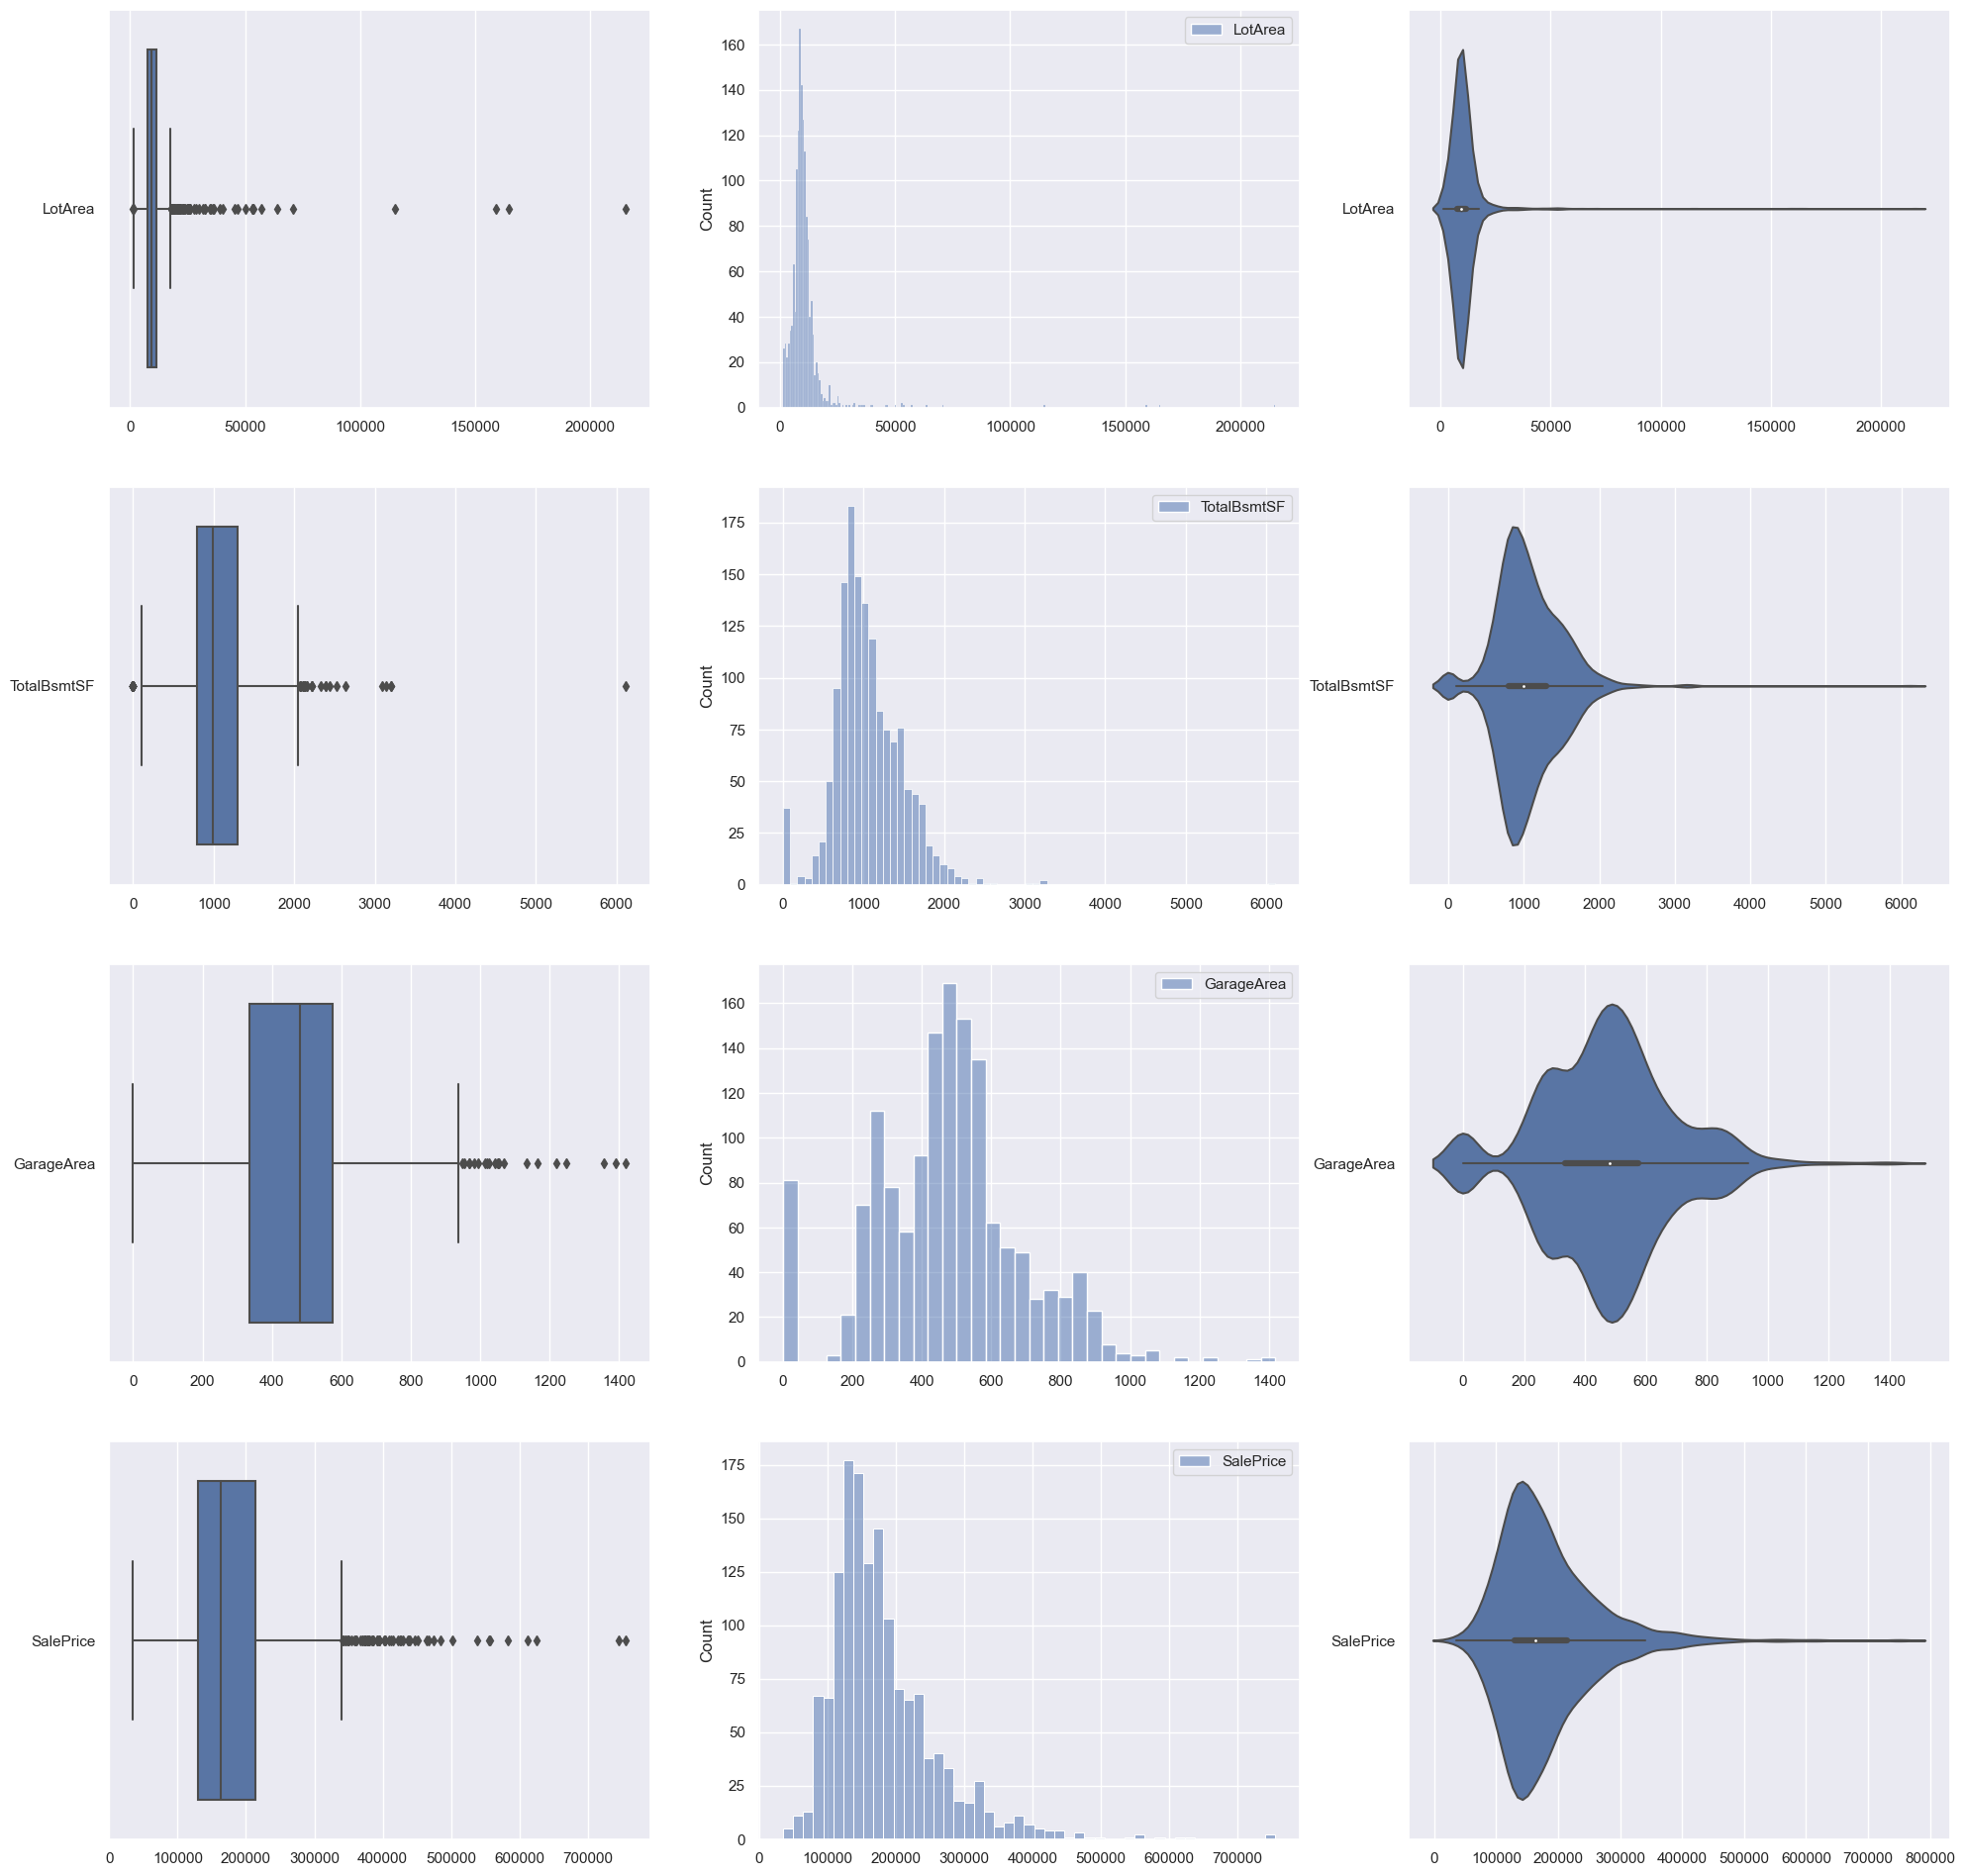

In [18]:
# Set up matplotlib figure with three subplot
f, axes = plt.subplots(4, 3, figsize = (24,24))

# Plot the basic uni-variate figures for LotArea, TotalBsmtSF, Garage Area, SalePrice
sb.boxplot(data = houseLotArea, orient = "h", ax = axes[0,0])
sb.histplot(data = houseLotArea, ax = axes[0,1])
sb.violinplot(data = houseLotArea, orient = "h", ax = axes[0,2])

sb.boxplot(data = houseTotalBsmtSF, orient = "h", ax = axes[1,0])
sb.histplot(data = houseTotalBsmtSF, ax = axes[1,1])
sb.violinplot(data = houseTotalBsmtSF, orient = "h", ax = axes[1,2])

sb.boxplot(data = houseGarageArea, orient = "h", ax = axes[2,0])
sb.histplot(data = houseGarageArea, ax = axes[2,1])
sb.violinplot(data = houseGarageArea, orient = "h", ax = axes[2,2])

sb.boxplot(data = houseSalePrice, orient = "h", ax = axes[3,0])
sb.histplot(data = houseSalePrice, ax = axes[3,1])
sb.violinplot(data = houseSalePrice, orient = "h", ax = axes[3,2])

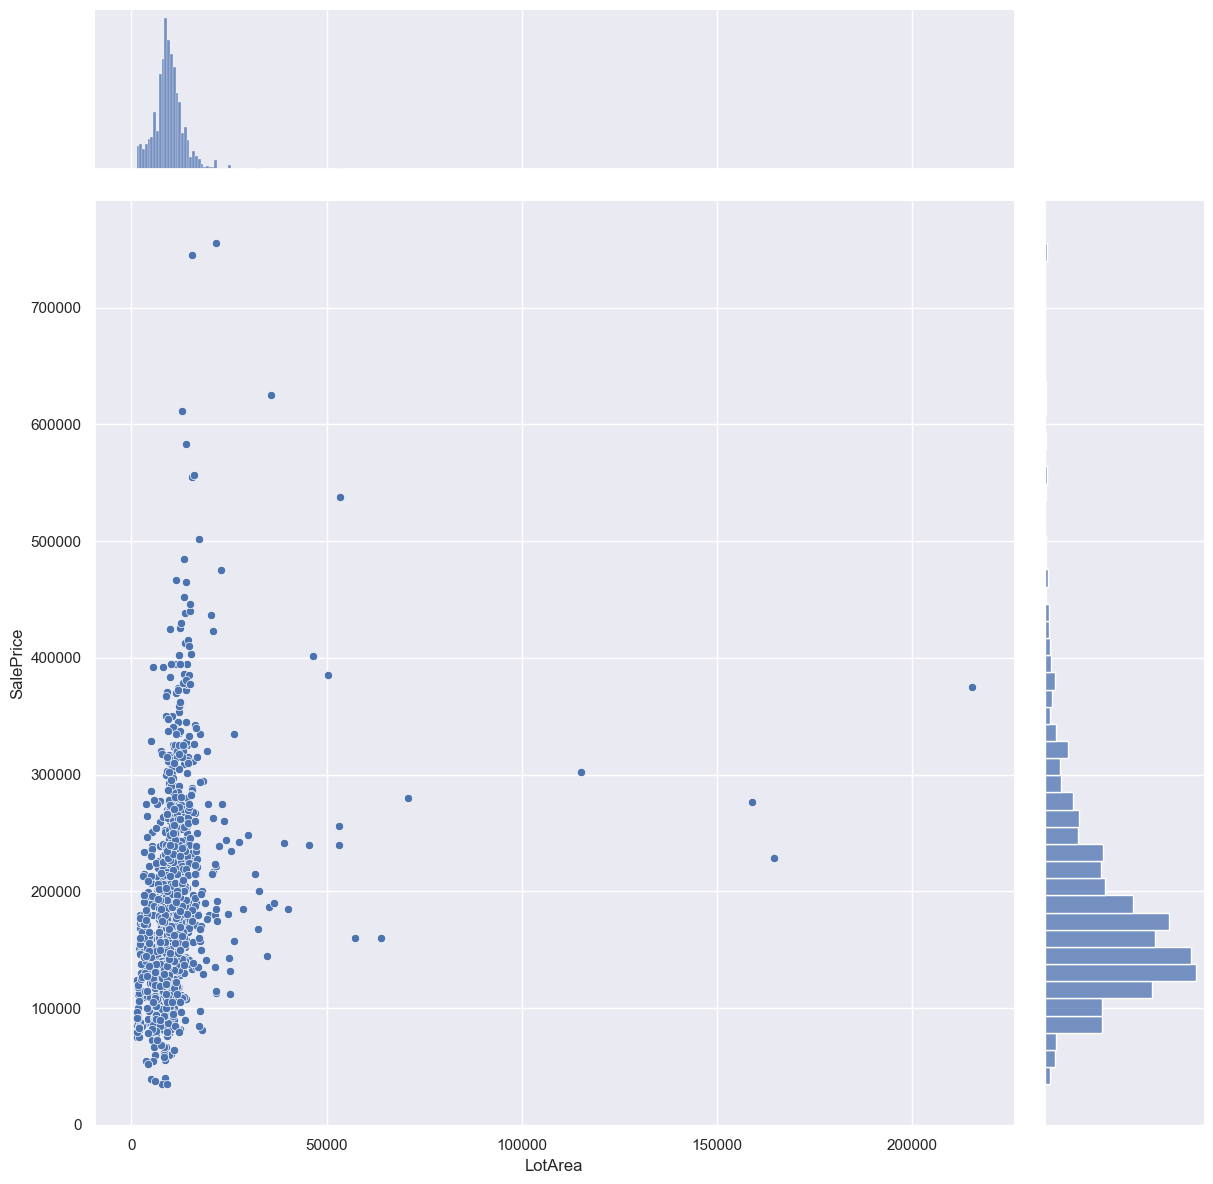

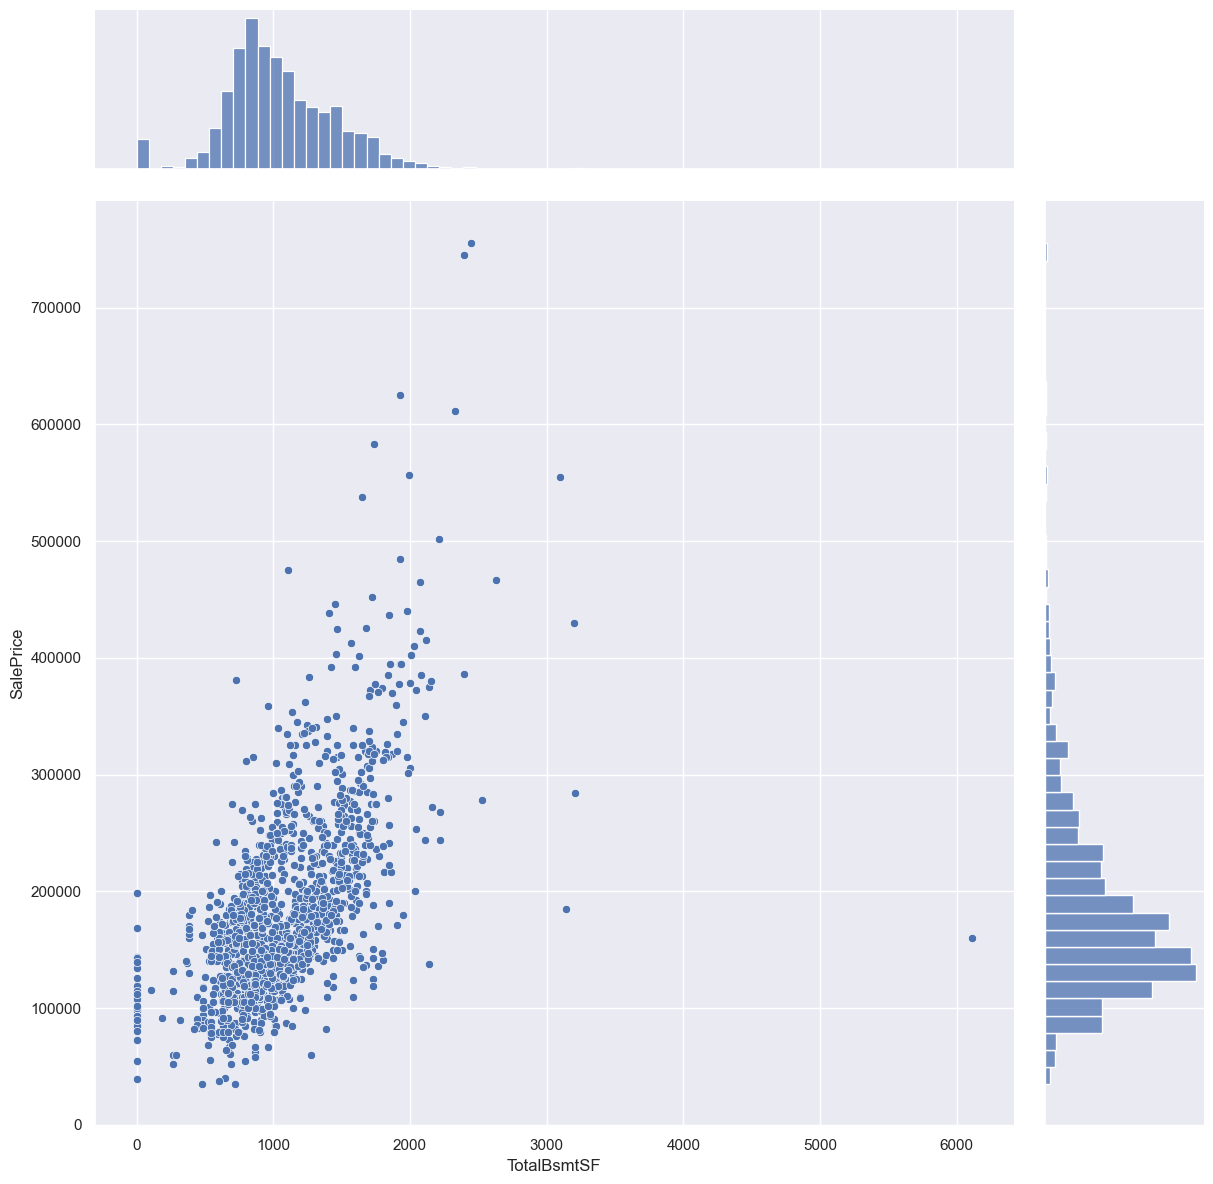

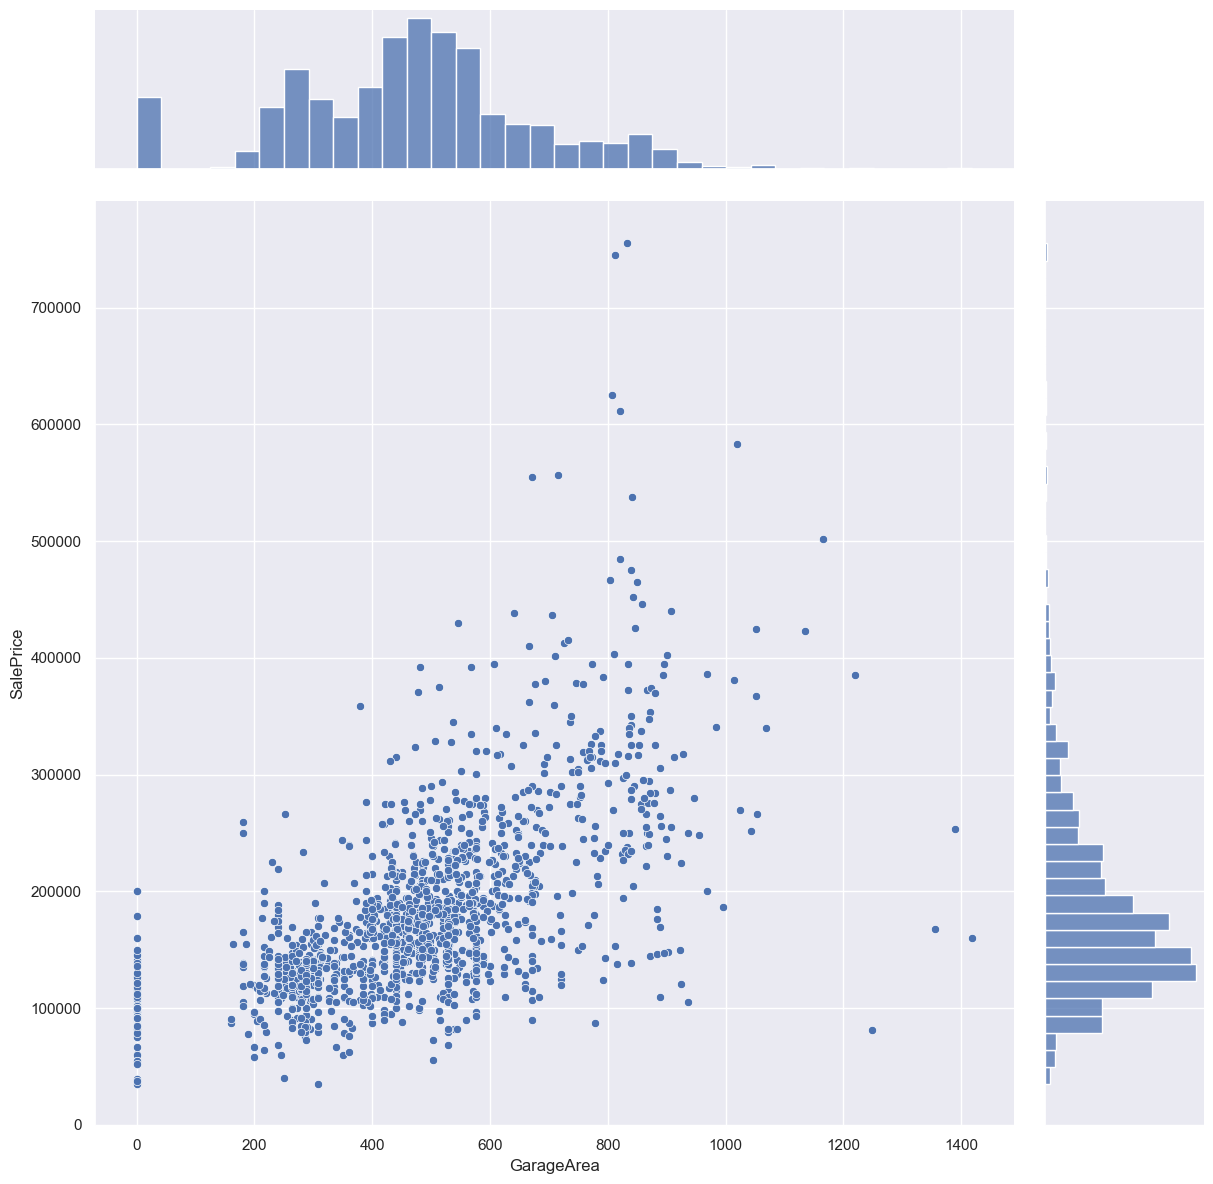

In [60]:
# Dont need to do concat since House Data has everything
sb.jointplot(data = houseData, x = 'LotArea', y = 'SalePrice', height = 12)

sb.jointplot(data = houseData, x = 'TotalBsmtSF', y = 'SalePrice', height = 12)

sb.jointplot(data = houseData, x = 'GarageArea', y = 'SalePrice', height = 12)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

linreg = LinearRegression()

In [62]:
# Split the Dataset into Train and Test RANDOMLY
houseLotArea_train, houseLotArea_test, houseTotalBsmtSF_train, houseTotalBsmtSF_test, houseGarageArea_train, houseGarageArea_test, houseSalePrice_train, houseSalePrice_test = train_test_split(houseLotArea, houseTotalBsmtSF, houseGarageArea, houseSalePrice, random_state = None, test_size = 360/1460)
print("Train Set: ", houseLotArea_train.shape, houseTotalBsmtSF_train.shape, houseGarageArea_train.shape, houseSalePrice_train.shape)
print("Test Set:", houseLotArea_test.shape, houseTotalBsmtSF_test.shape, houseGarageArea_test.shape, houseSalePrice_test.shape)

Train Set:  (1100, 1) (1100, 1) (1100, 1) (1100, 1)
Test Set: (360, 1) (360, 1) (360, 1) (360, 1)


## LOT-AREA TO SALE-PRICE


In [89]:
linreg.fit(houseLotArea_train, houseSalePrice_train)

LinearRegression()

In [90]:
# Coefficients of the Linear Regression Line
intercept_LotArea = linreg.intercept_
coef_LotArea = linreg.coef_
print('Intercept \t: b = ', intercept_LotArea)
print('Coefficients \t: a =', coef_LotArea )

Intercept 	: b =  [162139.83563809]
Coefficients 	: a = [[1.91428315]]


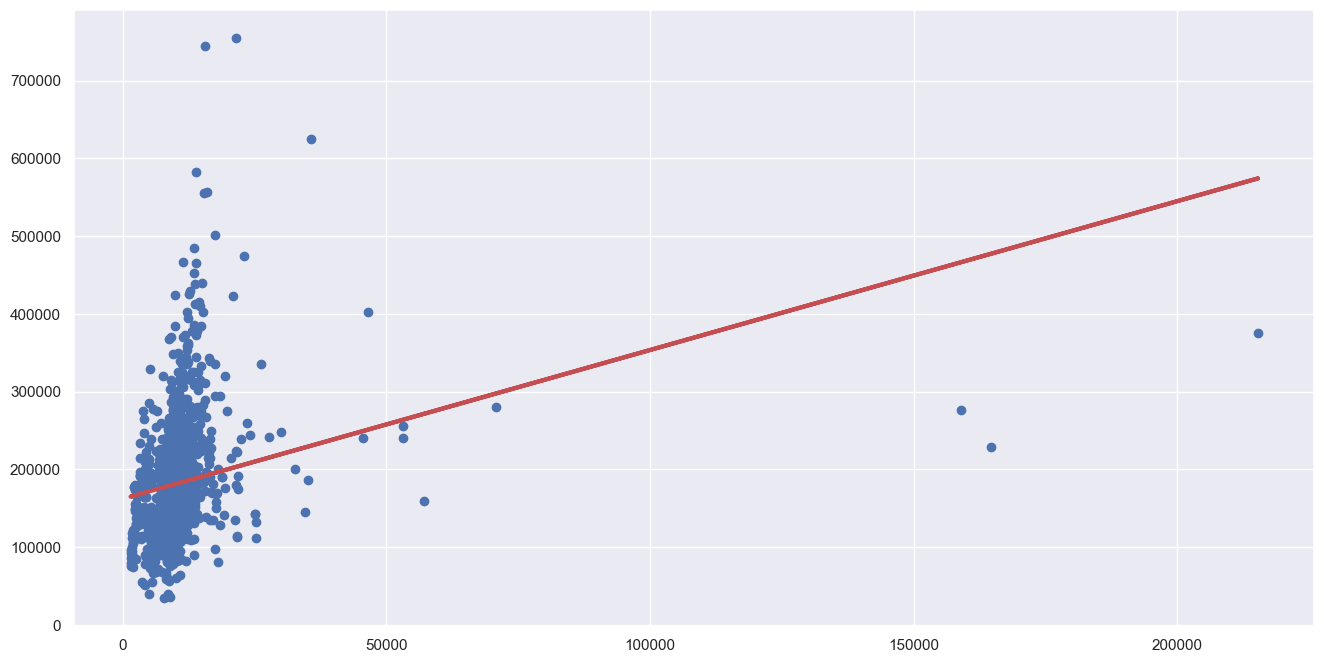

In [91]:
# Formula for regression line
regline_x = houseLotArea_train
regline_y = linreg.intercept_ + linreg.coef_ * houseLotArea_train

# Plot the linear regression line
f = plt.figure(figsize = (16,8))
plt.scatter(houseLotArea_train, houseSalePrice_train)
plt.plot(regline_x, regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()

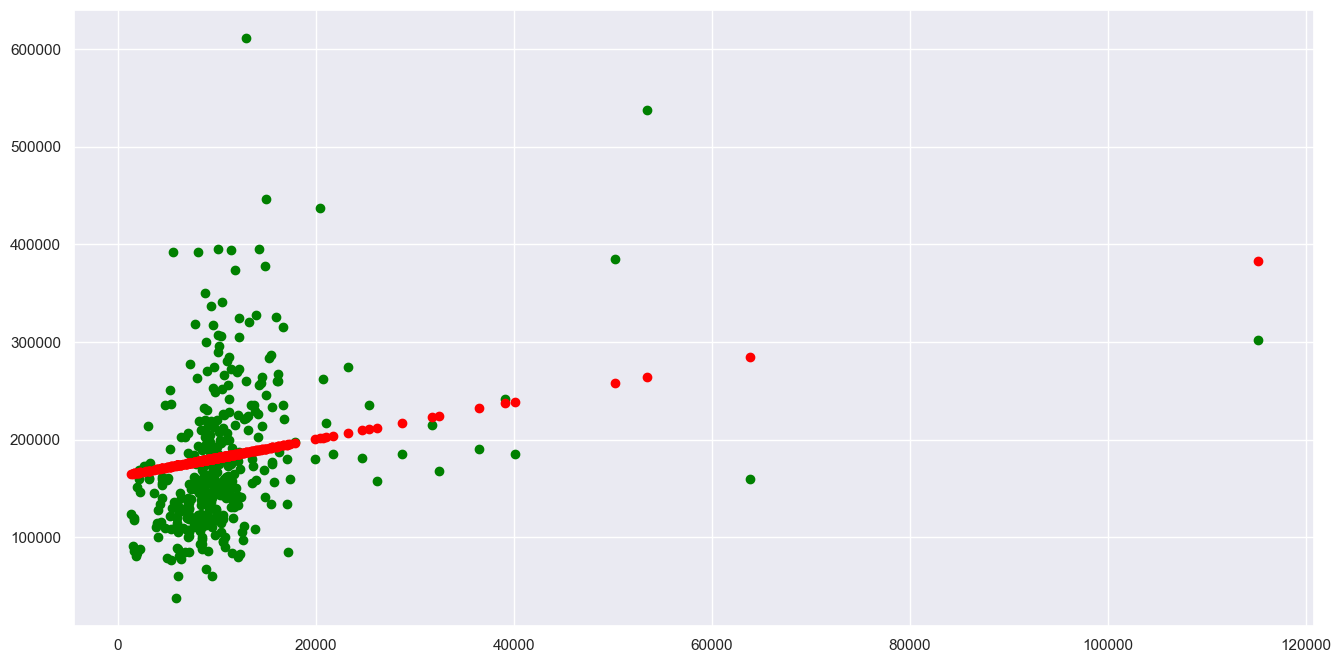

In [92]:
total_houseSalePrice_pred = linreg.predict(houseLotArea_test)

f = plt.figure(figsize = (16,8))
plt.scatter(houseLotArea_test, houseSalePrice_test, color = 'green')
plt.scatter(houseLotArea_test, total_houseSalePrice_pred, color = 'red')
plt.show()

## Total Bsmt SF TO SALE-PRICE


In [93]:
linreg.fit(houseTotalBsmtSF_train, houseSalePrice_train)

LinearRegression()

In [86]:
intercept_TotalBsmtSF = linreg.intercept_
coef_TotalBsmtSF = linreg.coef_
print('Intercept \t: b = ', intercept_TotalBsmtSF)
print('Coefficients \t: a = ', coef_TotalBsmtSF )

Intercept 	: b =  [49631.46860992]
Coefficients 	: a =  [[124.69122218]]
